### Executing R commands within a Python notebook

The examples below mix Python and R commands in the same notebook, using the Rpy2 "cell magic". Such notebooks are called *polyglot* notebooks as they combine multiple languages as part of a single analysis.

* Install R

In [ ]:
!sudo -H apt-get -y install r-base

* Install the rpy2 package

In [ ]:
!sudo -H pip3 install -U rpy2

In [2]:
# First we load the R magic command
# Documentation at http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic
%reload_ext rpy2.ipython

By adding the `%R` we execute R commands:

In [3]:
%R X=c(1,4,5,7); 

In [4]:
%R sd(X)

array([ 2.5])

In [5]:
%R mean(X)

array([ 4.25])

In [6]:
%R X=c(1,4,5,7); sd(X)

array([ 2.5])

In [7]:
# Notice that we cannot directly access the R variables in Python...
print(len(X))
print(sum(X))

NameError: name 'X' is not defined

In [8]:
# but we can use the Rpull command to fetch the variable from R to Python
%Rpull X
print(len(X))
print(sum(X))

4
17.0


In [9]:
import numpy as np
Z = np.array([1,4,5,10])
Z.mean()

5.0

In [10]:
%R mean(Z)


Error in mean(Z) : object 'Z' not found


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in mean(Z) : object 'Z' not found

  warnings.warn(x, RRuntimeWarning)


In [11]:
%Rpush Z
%R mean(Z)

array([ 5.])

Objects can be passed back and forth between rpy2 and python via the -i -o flags in line:

In [12]:
%R -i Z mean(Z)

array([ 5.])

In [ ]:
%%R
install.packages('ggplot2')

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)


Selection: 1


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: also installing the dependencies ‘stringi’, ‘magrittr’, ‘colorspace’, ‘Rcpp’, ‘stringr’, ‘RColorBrewer’, ‘dichromat’, ‘munsell’, ‘labeling’, ‘assertthat’, ‘digest’, ‘gtable’, ‘plyr’, ‘reshape2’, ‘scales’, ‘tibble’, ‘lazyeval’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: trying URL 'https://cloud.r-project.org/src/contrib/stringi_1.1.2.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  length 3644855 bytes (3.5 MB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr

In [15]:
%%R
library(ggplot2)
mtcars$gear <- factor(mtcars$gear,levels=c(3,4,5), labels=c("3gears","4gears","5gears")) ;
mtcars$am <- factor(mtcars$am,levels=c(0,1), labels=c("Automatic","Manual")) ;
mtcars$cyl <- factor(mtcars$cyl,levels=c(4,6,8), labels=c("4cyl","6cyl","8cyl")) ;

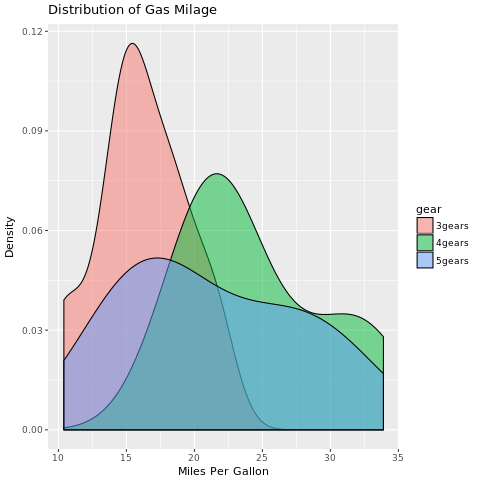

In [14]:
%%R
qplot(mpg, data=mtcars, geom="density", fill=gear, alpha=I(.5), 
   main="Distribution of Gas Milage", xlab="Miles Per Gallon", 
   ylab="Density")
